In [19]:
# Let's load the dataset and take a look at its structure before proceeding with applying the Decision Tree Classifier.
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
file_path = 'diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Step 1: Preprocessing - Checking for any missing values
data.isnull().sum()  # To see if there are missing values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [5]:

# Step 2: Split the data into features (X) and target (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

In [6]:
# Step 3: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Apply Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Step 5: Make predictions
y_pred = classifier.predict(X_test)

In [9]:
# Step 6: Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [10]:
conf_matrix

array([[75, 24],
       [15, 40]], dtype=int64)

In [16]:
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [1]:
# Step 7: Plot the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(classifier, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Decision Tree Classifier')

plt.savefig('DT')
plt.show()

NameError: name 'plt' is not defined

In [25]:
# Example input (adjust values based on your specific case)
#Pregnancies, Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
new_input = [[2, 120, 70, 20, 85, 30.0, 0.5, 29]]   

# Predict the class for the new input
predicted_class = classifier.predict(new_input)

# Display the predicted class
if predicted_class[0] == 1:
    print("Predicted: Diabetes")
else:
    print("Predicted: No Diabetes")



Predicted: No Diabetes


In [23]:
new_input2 = [[6, 150, 80, 35, 130, 35.5, 0.8, 50]]

predicted_class2 = classifier.predict(new_input2)

if predicted_class2[0] == 1:
    print("Predicted: Diabetes")
else:
    print("Predicted: No Diabetes")

Predicted: Diabetes


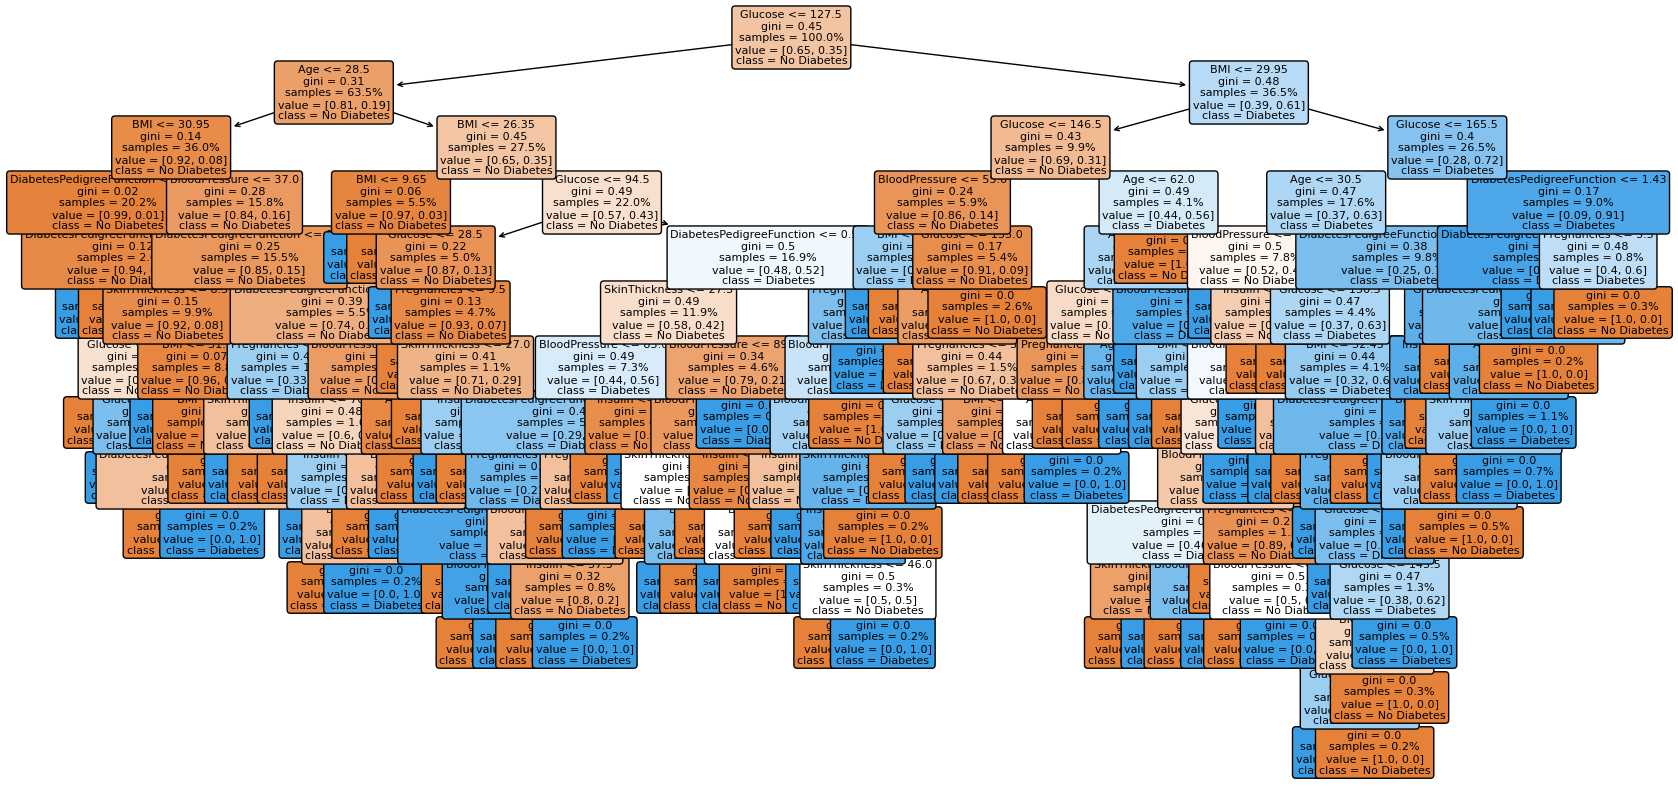

In [33]:
plt.figure(figsize=(20,10))  # Increase the figure size for better readability

# Plot the tree with detailed information
tree.plot_tree(
    classifier, 
    feature_names=X.columns, 
    class_names=['No Diabetes', 'Diabetes'], 
    filled=True, 
    rounded=True, 
    precision=2,  # Display precision for threshold values
    fontsize=8,   # Adjust font size for better readability
    proportion=True  # Show proportions of classes at each node
)
plt.savefig('DT2')
plt.show()